## Final Project

# Analysis of Countries with Most Highly Rated Coffee


### __Data Source__
         
   https://github.com/jldbc/coffee-quality-database/raw/master/data/arabica_data_cleaned.csv   
   Data file size:   634 KB
 
The dataset contains reviews of 1311 arabica coffee beans and  from the Coffee Quality Institute's trained reviewers. Data was scrapped by github user 'jldbc' from CQI online database. Retrieved from https://github.com/jldbc/coffee-quality-database

This dataset represents the data about professionally rated coffee samples from all over the world. It has 1311 rows and 44 columns. 

Some of the most important columns are Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness, Cupper.Points, Total.Cup.Points, and Moisture.

These are all rated criteria that trained and certified coffee graders use to assess coffee quality. I am interested in this data because I huge fan of coffee. The world of coffee is incredibly diverse and I want to see how and where the best coffees fit in.


As the data was scrapped in 2018, I will compare the data with GDP for each country taken from the World Bank from the year 2018.
this dataset can be found here: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD


### __Introduction__

Coffee is a drink prepared by steeping the roasted, ground seed of the coffee cherries in hot water. It is drank widely around the world. There are a dizzying amount of retailers of coffee and coffee products available almost everywhere in the US. The discerning coffee drinker will want to have a great tasting coffee available to them. I want to see where the most highly rated coffees come from and if there is room for more coffee production in those countries.

There are distinct coffee characteristics considered when grading.

- Aroma 
- Flavor
- Aftertaste
- Acidity
- Body
- Balance
- Uniformity
- Clean.Cup
- Sweetness
- Cupper.Points
- Total.Cup.Points
- Moisture


### __Objective__

To discover which Countries score highest in terms of coffee quality, and where might be the best places to consider investing into in order to bring great coffee to the masses.

## The Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [44]:
# load .csv as a pandas dataframe
df = pd.read_csv('https://github.com/jldbc/coffee-quality-database/raw/master/data/arabica_data_cleaned.csv')
df_gdp = pd.read_csv(r'gdp.csv', skiprows=3)

## The Details

In [4]:
# check characteristics of the data
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
# get size of dataframe displayed as (rows, columns)
df.shape

(1311, 44)

In [6]:
# concise summary of index dtype and columns, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

### The data and some discrepancies

- The dataframe has 44 columns and 1311 rows. The data itself is stored in float, int, or object data types.

- The data for the scoring the coffee all appears to be present (Columns 20-32 and 35)

- There are some discrepancies regarding details about the data like Farm.Name, Lot.Number, Company, Producer

- While these are important data they are not immediately relevant to the stated objective.

In [7]:
# Converting the data type base on the contents of the column.

df = df.convert_dtypes()
df.dtypes

Unnamed: 0                 Int64
Species                   string
Owner                     string
Country.of.Origin         string
Farm.Name                 string
Lot.Number                string
Mill                      string
ICO.Number                string
Company                   string
Altitude                  string
Region                    string
Producer                  string
Number.of.Bags             Int64
Bag.Weight                string
In.Country.Partner        string
Harvest.Year              string
Grading.Date              string
Owner.1                   string
Variety                   string
Processing.Method         string
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [8]:
# checking to see if all are of the same species being considered
# expect to see only arabica beans
df['Species'].value_counts()

Arabica    1311
Name: Species, dtype: Int64

Because the all the entries are of the same species we can begin to narrow our data to the ones most relevant to observations we seek

### Resizing the data frame to show desired features 

In [9]:
# slicing dataframe to contain country and grading characteristics
countries = df.loc[:,'Country.of.Origin']
df_ratings = pd.concat([df['Country.of.Origin'] ,df.loc[:, 'Aroma':'Category.One.Defects' ],df['Category.Two.Defects'] ], axis= 1)

print(df_ratings.info())
print(df_ratings.shape)

df_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1310 non-null   string 
 1   Aroma                 1311 non-null   float64
 2   Flavor                1311 non-null   float64
 3   Aftertaste            1311 non-null   float64
 4   Acidity               1311 non-null   float64
 5   Body                  1311 non-null   float64
 6   Balance               1311 non-null   float64
 7   Uniformity            1311 non-null   float64
 8   Clean.Cup             1311 non-null   float64
 9   Sweetness             1311 non-null   float64
 10  Cupper.Points         1311 non-null   float64
 11  Total.Cup.Points      1311 non-null   float64
 12  Moisture              1311 non-null   float64
 13  Category.One.Defects  1311 non-null   Int64  
 14  Category.Two.Defects  1311 non-null   Int64  
dtypes: Int64(2), float64(

,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,1
2,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,2
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Mexico,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0,20
1307,Haiti,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8,16
1308,Nicaragua,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,63.08,0.13,1,5
1309,Guatemala,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,59.83,0.10,0,4


All in all its looking good. There is one unidentified country.

In [10]:
# Which entry does not have country of origin?
df_ratings[df_ratings.isna().any(axis=1)]

,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
1197,<NA>,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,79.08,0.1,0,3


In [11]:
df.loc[1197]

Unnamed: 0                                                   1198
Species                                                   Arabica
Owner                                          racafe & cia s.c.a
Country.of.Origin                                            <NA>
Farm.Name                                                    <NA>
Lot.Number                                                   <NA>
Mill                                                         <NA>
ICO.Number                                              3-37-1980
Company                                                      <NA>
Altitude                                                     <NA>
Region                                                       <NA>
Producer                                                     <NA>
Number.of.Bags                                                149
Bag.Weight                                                  70 kg
In.Country.Partner                                       Almacafé
Harvest.Ye

The only discernible field that can identify the coffee is in the Owner column. As the country of origin is critical to my observation it is better to drop the row than keep it and have it muddy the values. 

In [12]:
df_ratings = df_ratings.dropna()

In [13]:
# checking dataframe consistency by sampling random columns
df_ratings.sample(12)

,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
713,Brazil,7.42,7.50,7.50,7.42,7.50,7.58,10.00,10.00,10.0,7.42,82.33,0.11,0,10
1086,Burundi,7.08,7.25,7.17,7.33,7.08,7.08,10.00,10.00,10.0,7.33,80.33,0.12,0,0
370,Guatemala,7.83,7.50,7.50,8.00,7.67,7.50,10.00,10.00,10.0,7.50,83.50,0.10,0,5
1138,United States (Hawaii),7.50,7.42,7.58,7.42,7.50,7.58,8.67,8.67,10.0,7.58,79.92,0.05,3,0
105,Guatemala,7.83,8.08,7.67,8.00,7.75,7.67,10.00,10.00,10.0,8.00,85.00,0.04,0,1
617,Taiwan,8.00,7.83,7.83,7.42,7.25,7.25,10.00,10.00,10.0,7.08,82.67,0.08,0,0
777,Indonesia,7.50,7.50,7.42,7.42,7.50,7.42,10.00,10.00,10.0,7.33,82.08,0.15,0,3
824,Honduras,7.42,7.33,7.33,7.58,7.33,7.50,10.00,10.00,10.0,7.42,81.92,0.11,0,0
546,Guatemala,7.75,7.50,7.42,7.58,7.67,7.50,10.00,10.00,10.0,7.50,82.92,0.10,0,1
91,United States (Hawaii),7.58,7.83,7.83,7.92,7.83,8.17,10.00,10.00,10.0,7.92,85.08,0.11,2,2


In [14]:
# checking countries to see if there are any other unexpected values
df_ratings['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Myanmar                           8
United States                     8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                     

While everything seems to be in order when trying to make a general assessment of the kind and quality of coffee being produced in a given region its better to have a larger sample size to compare against. It is better if we drop the countries listed that have fewer than 10 rated samples.

In [15]:
counts = df_ratings['Country.of.Origin'].value_counts()
df_cleaned = df_ratings[df_ratings['Country.of.Origin'].isin(counts.index[counts>=10])]

df_cleaned['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Name: Country.of.Origin, dtype: Int64

In [52]:
# preparing to add gdp for 2018 to my dataframe
df_gdp = df_gdp[['Country Name', '2018']]
df_gdp = df_gdp.rename(columns={"Country Name": "Country.of.Origin", "2018": "GDP"})

In [57]:
# make sure that names match dataframes to prevent data loss
df_cleaned = df_cleaned.replace({'United States (Hawaii)': 'United States', 'Tanzania, United Republic Of' : 'Tanzania' })
print(df_cleaned.shape)
df_cleaned['Country.of.Origin'].value_counts()

(1255, 15)


Mexico           236
Colombia         183
Guatemala        181
Brazil           132
Taiwan            75
United States     73
Honduras          53
Costa Rica        51
Ethiopia          44
Tanzania          40
Thailand          32
Uganda            26
Nicaragua         26
Kenya             25
El Salvador       21
Indonesia         20
China             16
Malawi            11
Peru              10
Name: Country.of.Origin, dtype: int64

In [69]:
df_merged = pd.merge(df_cleaned, df_gdp, on='Country.of.Origin', how='inner')
print(df_merged.shape)
df_merged

(1180, 16)


,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,GDP
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.00,8.75,90.58,0.12,0,0,8.426935e+10
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.00,8.58,89.92,0.12,0,1,8.426935e+10
2,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.00,8.67,89.00,0.11,0,2,8.426935e+10
3,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.00,8.58,88.83,0.12,0,2,8.426935e+10
4,Ethiopia,8.25,8.33,8.50,8.42,8.33,8.50,10.0,10.0,9.33,9.00,88.67,0.03,0,0,8.426935e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,Malawi,7.67,7.42,6.92,7.50,7.50,7.17,10.0,10.0,10.00,7.33,81.50,0.12,0,0,9.712995e+09
1176,Malawi,7.58,7.17,7.33,7.42,7.08,7.42,10.0,10.0,10.00,7.42,81.42,0.12,0,0,9.712995e+09
1177,Malawi,7.75,7.33,7.08,7.33,7.33,7.25,10.0,10.0,10.00,7.25,81.33,0.13,0,1,9.712995e+09
1178,Malawi,7.58,7.25,7.33,7.08,7.33,7.33,10.0,10.0,10.00,7.25,81.17,0.12,0,12,9.712995e+09


Sadly, merging the data means that we lose all data on Taiwan, totaling 75 samples. The reasons for this are suspected but not known for certain. We will continue for now. 

### Sanity Checks
#### AKA "I'm not crazy right?"
- there should be no negative values 
- All columns excluding the last four are scored out of 10 points
- Total.Cup.Points is scored out of 100
- Moisture is a percentage and should not exceed 1
- The 'defects' categories are count values
- GDP is expected to be exceedingly large

In [61]:
# check for min and max values
print('{0:30}'.format(''),'{0:30}'.format('min'), 'max')

for _ in df_merged.loc[:, 'Aroma':]:
    minmax = [df_merged[_].min(), df_merged[_].max()]
    print('{0:30}'.format(_+':'), minmax[0],'{0:30}'.format(minmax[1]) )

                               min                            max
Aroma:                         0.0                           8.75
Flavor:                        0.0                           8.83
Aftertaste:                    0.0                           8.67
Acidity:                       0.0                           8.75
Body:                          0.0                           8.58
Balance:                       0.0                           8.75
Uniformity:                    0.0                           10.0
Clean.Cup:                     0.0                           10.0
Sweetness:                     0.0                           10.0
Cupper.Points:                 0.0                           9.25
Total.Cup.Points:              0.0                          90.58
Moisture:                      0.0                           0.28
Category.One.Defects:          0                             31
Category.Two.Defects:          0                             55
GDP:          

In [62]:
df_ratings_grouped = df_merged.groupby('Country.of.Origin')

In [63]:
details_by_country = df_ratings_grouped.describe()
details_by_country


Aroma                                                       Flavor                                                        Aftertaste                                                       Acidity                                                        Body                                                      Balance                                                    Uniformity                                                        Clean.Cup                                                      Sweetness                                                      Cupper.Points                                                       Total.Cup.Points                                                               Moisture                                                        Category.One.Defects                                               Category.Two.Defects                                                    GDP                                                                    \
                   count      mean       std   min     25%   50%     75%   max  count      mean       std   min     25%    50%     75%   max      count      mean       std   min     25%   50%     75%   max   count      mean       std   min     25%    50%   75%   max  count      mean       std   min     25%    50%   75%   max   count      mean       std   min   25%    50%   75%   max      count       mean       std    min    25%     50%   75%   max     count       mean       std    min    25%   50%   75%   max     count       mean       std    min    25%   50%   75%   max         count      mean       std   min     25%   50%     75%   max            count       mean        std    min      25%     50%      75%    max    count      mean       std   min     25%    50%     75%   max                count      mean       std  min  25%  50%  75%   max                count      mean       std  min   25%  50%   75%   max  count          mean       std           min           25%           50%   
Country.of.Origin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Brazil             132.0  7.553106  0.327135  6.83  7.3300  7.50  7.6700  8.58  132.0  7.573561  0.277525  6.58  7.4200  7.580  7.7500  8.50      132.0  7.440530  0.273022  6.58  7.3100  7.42  7.5800  8.42   132.0  7.511439  0.258676  6.83  7.4200  7.500  7.67  8.50  132.0  7.544545  0.252754  6.83  7.4200  7.500  7.67  8.33   132.0  7.531515  0.297861  6.42  7.42  7.500  7.67  8.33      132.0   9.884924  0.475702   6.00  10.00  10.000  10.0  10.0     132.0   9.853485  0.612465   6.00  10.00  10.0  10.0  10.0     132.0   9.949394  0.314962   6.67  10.00  10.0  10.0  10.0         132.0  7.562955  0.319139  6.67  7.4200  7.50  7.7500  8.50            132.0  82.405909   2.132902  70.67  81.7300  82.420  83.2500  88.83    132.0  0.082348  0.049034  0.00  0.0200  0.110  0.1100  0.12                132.0  0.128788  0.597773  0.0  0.0  0.0  0.0   5.0                132.0  3.598485  5.633677  0.0  1.00  2.0  4.00  55.0  132.0  1.916947e+12  0.000245  1.916947e+12  1.916947e+12  1.916947e+12   
China          

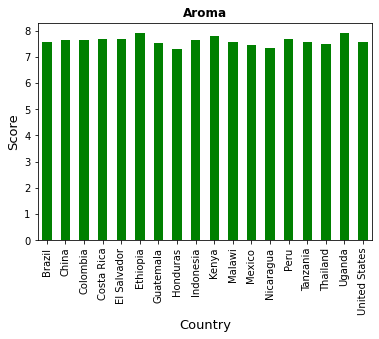

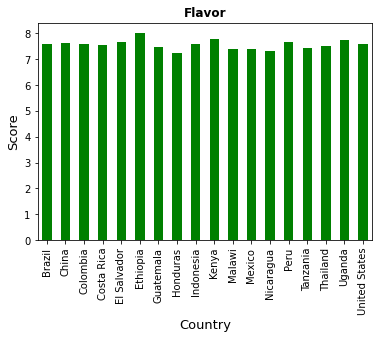

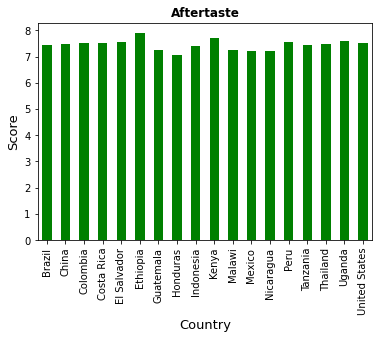

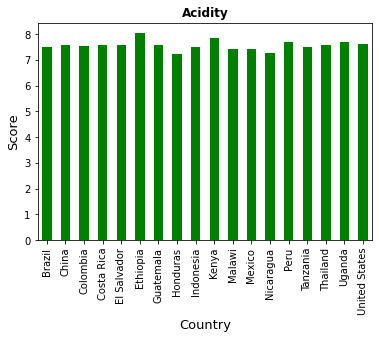

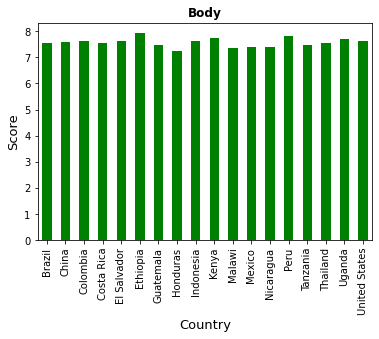

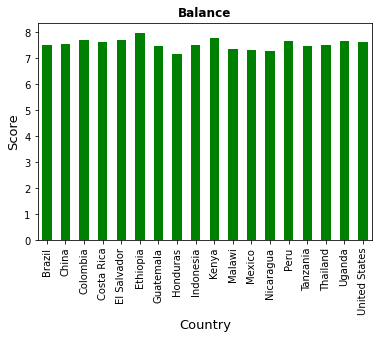

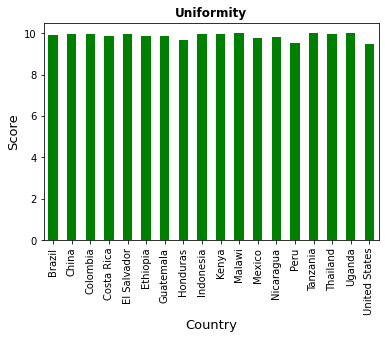

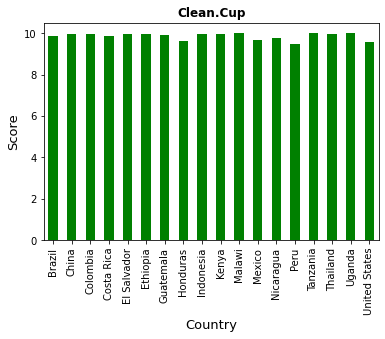

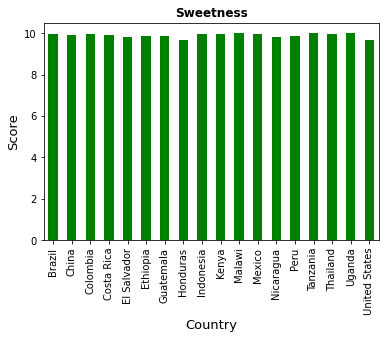

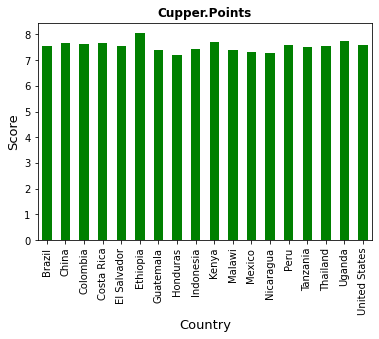

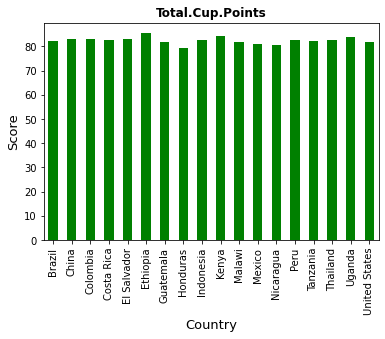

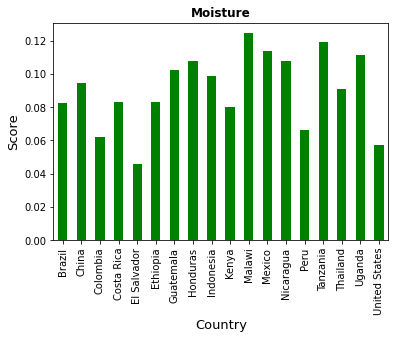

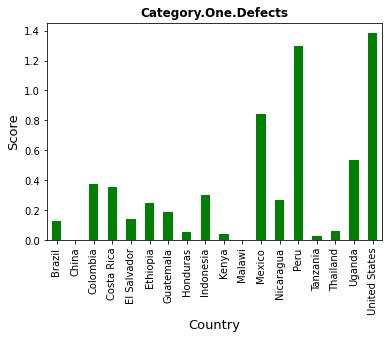

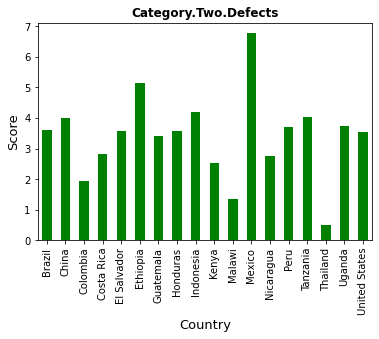

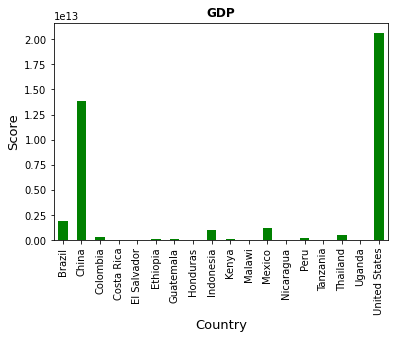

In [68]:
mean_by_country = df_ratings_grouped.mean()
for category in mean_by_country:
    # print(category[0]+'\n',details_by_country[category[0]][category[1]])
    mean_by_country[category].plot(kind='bar',color='green')
    plt.title(category,fontweight="bold")
    plt.xlabel('Country',fontsize=13)
    plt.ylabel('Score',fontsize=13)
    plt.show()
# mean_by_country

### Observations

- The best scoring countries across the board based the coffee characteristics (Aroma, Flavor, Aftertaste, Acidity, Body, Balance) Always seemed to lead with Ethiopia with Kenya, Peru, and Uganda vying for 2nd, 3rd, and 4th places. 

- Total points follow the same trends mentioned above.

- Ethiopian coffees were the reviewers' favorite (Cupper.Points).

- 3 characteristics stood out because for the most part few points were lost for samples from all countries (Uniformity, Clean.Cup, Sweetness).

- The United States' offerings preformed reasonably well, but having far and away the largest GDP suffered some of the most primary defects.

- Mexico stood out for having the most secondary defects followed, interestingly, by Ethiopia.

- The GDP's of the highest performing coffee samples are all quite low.

### What I learned

I learned that while there is a discernible difference in coffee qualities across countries the difference is generally not that great when looking at the data at 10,000 feet. Also, it was surprising to see that samples from the US had so very many primary defects from insect infestation to rotting on the outside of the coffee bean. Also, I was surprised that Mexico had the most samples present in this database.

### Conclusions

It is worthwhile to invest in the the top four performing countries: Ethiopia, Kenya, Peru, and Uganda. All other samples still did perform well on average, but it is a good idea to start with these four for further investigation into where the investor's money will go the furthest.